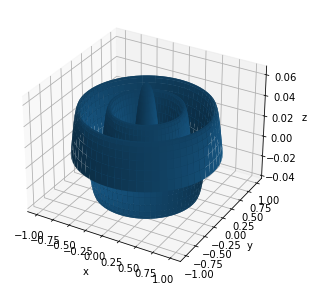

Время выполнения программы: 1.9737584590911865 секунд


0.06608844742031808

In [40]:
import numpy as np
import math as ma
import time 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
start_time = time.time()

N=64
M=64
o=int(np.log2(M))
hr=1/(N+0.5)
hp=2*(ma.pi)/(M)

s=(N+1)*(M)


r=np.zeros(N+1)
for n in range (N+1):
    r[n]=(n+0.5)*hr

phi=np.zeros(M+1)
for m in range (M+1):
    phi[m]=m*hp

def num(m,n):
    return (N+1)*m+n
def rline(n):
    return (r[n]+r[n-1])*0.5


def printarray(B,I,J):
    for n in range (I):
        for m in range (J):
            t=B[n,m]
            print(f" {t:.2f}",end=" ")
        print("\n")

def lambd(q):
    return -4/(hp*hp)*ma.sin(q*hp/2)*ma.sin(q*hp/2)


def mu(q,i):
    t=int(M/2)
    if (q==0 or q==t):
        return ma.sqrt(1/(2*ma.pi))*np.cos(2*q*ma.pi*i/M)
    if (q>=1 and q<=t-1):        
        return ma.sqrt(1/(ma.pi))*np.cos(2*q*ma.pi*i/M)
    if (q>=t+1 and q<=M-1):
        return ma.sqrt(1/(ma.pi))*np.sin(2*(M-q)*ma.pi*i/M)

# N=int(N/2)
# M=int(M/2)

def f_(a,l,k):
    res=0
    for q in range (M):
        res+=a[num(q,k)]*mu(q,l)
    return res

    
def f(A,q,k):
    res=0
    for l in range (M):
        res+=hp*A[num(l,k)]*mu(q,l)
        
    return res  

def a(nomer,q,k,j):
    res=0
    if(q<=2**(o-1)):
        if (nomer==0):
            if(j==2**o or j==0):
                return 0.5*hp*F[num(j,k)]
            else:
                return hp*F[num(j,k)]
        elif(nomer==1):
            if (j==2**(o-1)):
                res=a(nomer-1,q,k,j)
            else:
                res=a(nomer-1,q,k,j)+a(nomer-1,q,k,2**o-j)
        else:
            if(j<2**(o-nomer)):
                res= a(nomer-1,q,k,j)+a(nomer-1,q,k,2**(o-nomer+1)-j)
            if (j>2**(o-nomer)):
                j2=2**(o-nomer)-j
                res= a(nomer-1,q,k,j2)-a(nomer-1,q,k,2**(o-nomer+1)-j2)
            else:
                res= a(nomer-1,q,k,j)
    return res
def b1(nomer,nomer2,q,k,s,j):
    res=0
    if (nomer==0):
        if(nomer2==1):
            return a(s,1,q,k,2**(o-s+2)-j) 
    g=int(nomer2/2)
    #g описан по формуле
    if(nomer2%2==0):
        res=b1(nomer-1,g,q,k,s,2*j)
    else:
        if(j==0):
            res=b1(nomer-1,g,q,k,s,1)
        else:
            res=b1(nomer-1,g,q,k,s,2*j-1)+b(nomer-1,g,q,k,s,2*j+1)
    return res
def z1(nomer,nomer2,p,q,k,s):
    res=0
    if(p==1):
        if(nomer==o-s):
            return b1(o-s,nomer2,1,q,k,s)
    if(p<=2**(o-s-nomer)):
        res=z1(nomer+1,2*nomer2,p,q,k,s)+1/(2*np.cos((2*p-1)*ma.pi/2**(o-s-(nomer+1)+2)))*z1(nomer+1,2*nomer2-1,p,q,k,s)
    if(p>2**(o-s-nomer)): 
        p2=p-2**(o-s-(nomer+1)+1)-1
        res=z1(nomer+1,2*nomer2,p2,q,k,s)-1/(2*np.cos((2*p2-1)*ma.pi/2**(o-s-(nomer+1)+2)))*z1(nomer+1,2*nomer2-1,p2,q,k,s)
    return res

def progonka(A,F,N):
    res=np.zeros(N)
    alp=np.zeros(N-1)
    bet=np.zeros(N-1)
    alp[0]=-A[0,1]/A[0,0]
    bet[0]=F[0]/A[0,0]
    for i in range (1,N-1):
        alp[i]=-A[i,i+1]/(A[i,i-1]*alp[i-1]+A[i,i])
        bet[i]=(F[i]-A[i,i-1]*bet[i-1])/(A[i,i-1]*alp[i-1]+A[i,i])
    res[N-1]=(F[N-1]-A[N-1,N-2]*bet[N-2])/(A[N-1,N-2]*alp[N-2]+A[N-1,N-1])
    for i in range (N-2,-1,-1):
        res[i]=alp[i]*res[i+1]+bet[i]
    return res


#Задаем функции f и alpha
F=np.zeros((N+1)*M)
alpha=np.zeros(M)




for m in range (M):
    alpha[m]=0
for m in range (M):
    F[num(m,N)]=alpha[m]
for n in range (N):
    for m in range (M):
        F[num(m,n)]=-10*ma.sin(5*ma.pi*r[n])
# for m in range (M):
#     alpha[m]=np.sin(phi[m])
# for m in range (M):
#     F[num(m,N)]=alpha[m]
# for n in range (N):
#     for m in range (M):
#         F[num(m,n)]=0



# for m in range (M):
#     alpha[m]=3
# for m in range (M):
#     F[num(m,N)]=alpha[m]
# for n in range (N):
#     for m in range (M):
#         F[num(m,n)]=2*ma.sin(phi[m])-ma.cos(phi[m])
# for m in range (M):
#     alpha[m]=1
# for m in range (M):
#     F[num(m,N)]=alpha[m]
# for n in range (N):
#     for m in range (M):
#         F[num(m,n)]=0
# for m in range (M):
#     alpha[m]=np.cos(phi[m])*np.cos(phi[m])
# for m in range (M):
#     F[num(m,N)]=alpha[m]
# for n in range (N):
#     for m in range (M):
#         F[num(m,n)]=2
# for m in range (M):
#     alpha[m]=1
# for m in range (M):
#     F[num(m,N)]=alpha[m]
# for n in range (N):
#     for m in range (M):
#         F[num(m,n)]=0
              


#решение систем после разложения в однократный ряд
func=np.zeros((N+1)*M)
y=np.zeros((N+1)*M)
t=np.zeros(N+1)
u=np.zeros((N+1)*M)
S=np.zeros(N+1)
A=np.zeros((N+1,N+1))
for q in range (M):
    for k in range (N+1):
        func[num(q,k)]=f(F,q,k)     
for q in range (M): 
    
    A[0,0]=(-1/(r[0]*hr*hr))*rline(1)+lambd(q)/(r[0]*r[0])
    A[0,1]=(1/(r[0]*hr*hr))*rline(1)

    for n in range (1,N):
#         A[n,n+1]=1/(r[n]*hr*hr)*rline(n+1)
#         A[n,n]=1/(r[n]*hr*hr)*(-rline(n+1)-rline(n))+lambd(q)/(r[n]*r[n])
#         A[n,n-1]=1/(r[n]*hr*hr)*(rline(n))
        A[n,n+1]=(2*r[n]+hr)/(2*r[n]*hr*hr)
        A[n,n]=-2/(hr*hr)+lambd(q)/(r[n]*r[n])
        A[n,n-1]=(2*r[n]-hr)/(2*r[n]*hr*hr)
    A[N,N]=1
    
    S=func[num(q,0):num(q+1,0)]
    t=progonka(A,S,N+1)
    for k in range (N+1):
        y[num(q,k)]=t[k]
for k in range (N+1):
    for l in range (M):
        u[num(l,k)]=f_(y,l,k) 
#вывод графиков
z=np.zeros((N+1,M+1))
for n in range (N+1):
    for m in range (M):
        z[n,m]=u[num(m,n)]
    z[n,M]=z[n,0]
x=np.zeros((N+1,M+1))
y=np.zeros((N+1,M+1))
for j in range (M+1):
    for i in range (N+1):
        x[i,j] =r[i]*np.cos(phi[j])
        y[i,j]= r[i]*np.sin(phi[j])
fig = plt.figure(figsize=(7,5))
ax_3d = fig.add_subplot(projection = '3d')
ax_3d.plot_surface(x, y, z,rcount=100, ccount=100)
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')
# ax_3d.zaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.show()


# plt.figure()
# plt.contourf(x,y,z)
# plt.colorbar()


end_time = time.time()  # время окончания выполнения
execution_time = end_time - start_time  # вычисляем время выполнения
print(f"Время выполнения программы: {execution_time} секунд")
np.max(z)

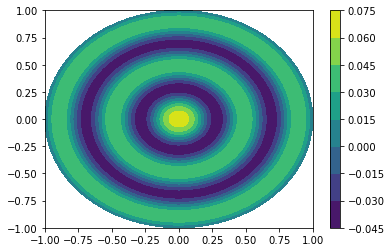

In [41]:
plt.figure()
plt.contourf(x,y,z)
plt.colorbar()